## This notebook uses each one of the 52 prediction models trained on autoML.ipynb to generate a gaussian_kde. Applied on the validation split (half) for the supernovae from type IA.

In [1]:
%load_ext autoreload
%autoreload 2
import os 
import sys
import h2o

import pandas as pd

In [2]:
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.modeling.functions_autoML import (read_models,
                                           gen_models_predictions,
                                           gen_gaussian_kde, 
                                           print_gaussian_kde,
                                           gen_df_gaussian_kde)

In [3]:
df = pd.read_pickle("../../data/structured/df.pkl")
#IA Filter
df = df.loc[df.type_bool == True]

In [4]:
BEST_MODEL = 'StackedEnsemble_AllModels_AutoML_20201223_115349.zip'

In [5]:
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,2 hours 0 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.6
H2O_cluster_version_age:,"1 year, 2 months and 4 days !!!"
H2O_cluster_name:,H2O_from_python_fm_utjgcm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.763 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


### Creating DataFrame with predictions

In [6]:
df_predictions = gen_models_predictions(df, read_models('../../models/mojo_50_ensemble'))

UnboundLocalError: local variable 'filenames' referenced before assignment

In [ ]:
df_predictions

,REDSHIFT_SPEC,XGBoost_1_AutoML_20201223_115349.zip,XGBoost_grid__1_AutoML_20201223_115349_model_10.zip,GBM_4_AutoML_20201223_115349.zip,GBM_1_AutoML_20201223_115349.zip,DeepLearning_grid__1_AutoML_20201223_115349_model_4.zip,XGBoost_grid__1_AutoML_20201223_115349_model_15.zip,XGBoost_grid__1_AutoML_20201223_115349_model_12.zip,GBM_grid__1_AutoML_20201223_115349_model_1.zip,DeepLearning_1_AutoML_20201223_115349.zip,...,DeepLearning_grid__1_AutoML_20201223_115349_model_3.zip,XGBoost_grid__1_AutoML_20201223_115349_model_7.zip,DeepLearning_grid__2_AutoML_20201223_115349_model_1.zip,DeepLearning_grid__2_AutoML_20201223_115349_model_3.zip,GBM_grid__1_AutoML_20201223_115349_model_9.zip,XGBoost_grid__1_AutoML_20201223_115349_model_3.zip,GBM_grid__1_AutoML_20201223_115349_model_4.zip,XGBoost_grid__1_AutoML_20201223_115349_model_1.zip,XGBoost_grid__1_AutoML_20201223_115349_model_14.zip,XGBoost_grid__1_AutoML_20201223_115349_model_5.zip
ID,,,,,,,,,,,,,,,,,,,,,
SN510924,0.85640,0.758497,0.836508,0.852613,0.850563,0.825417,0.781968,0.845545,0.816437,0.792203,...,0.807905,0.821024,0.805689,0.764388,0.816893,0.835475,0.832952,0.783759,0.819146,0.859398
SN511436,0.58313,0.507681,0.525491,0.543005,0.508194,0.573819,0.501801,0.525150,0.552097,0.629960,...,0.553159,0.512077,0.469968,0.544653,0.581435,0.541993,0.595570,0.549563,0.503407,0.511481
SN511804,0.99576,1.036642,0.998048,0.970336,0.983291,0.960788,0.939966,0.977827,0.976339,0.975903,...,0.934008,1.021369,0.996806,0.879006,0.942728,1.018136,0.980171,1.000845,1.021132,1.011526
SN511982,0.63949,0.634105,0.620484,0.644818,0.643628,0.679615,0.639117,0.636666,0.637424,0.660507,...,0.613721,0.595910,0.625146,0.596716,0.643661,0.634792,0.657661,0.622439,0.657133,0.633533
SN512006,0.99303,0.991672,0.976274,0.953687,0.933873,0.915063,0.993057,0.976797,0.900462,0.897987,...,0.904750,0.994939,0.962554,0.823331,0.903137,0.998670,0.892255,0.933956,0.950772,0.961386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98918,0.76083,0.879939,0.784775,0.844982,0.851925,0.929118,0.879383,0.837512,0.877673,0.936472,...,0.889807,0.896405,0.963980,0.853712,0.830647,0.831271,0.865906,0.848368,0.868214,0.814027
SN99404,0.89529,0.877423,0.641892,0.777510,0.880948,1.145137,0.892715,0.694415,0.576096,0.733627,...,1.030408,0.692480,0.983325,1.125120,0.463472,0.706696,0.481476,0.616368,0.749648,0.786757
SN99438,0.75966,0.764977,0.820338,0.766761,0.767321,0.794023,0.761007,0.789498,0.758127,0.787050,...,0.769244,0.749655,0.795503,0.722745,0.771736,0.796851,0.755075,0.804730,0.791266,0.782243


In [ ]:
best_model = h2o.import_mojo(f'../../models/mojo_50_ensemble/{BEST_MODEL}')
predictions = df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]].values.reshape(len(df_predictions),52)
y_best_pred = df_predictions[f'{BEST_MODEL}'].values
y_real = df_predictions['REDSHIFT_SPEC'].values

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1610420438060_53

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0029843621318644473
RMSE: 0.0546293156818246
MAE: 0.04095889497837518
RMSLE: 0.030993632001274172
Mean Residual Deviance: 0.0029843621318644473

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.007612769296751577
RMSE: 0.0872511850736228
MAE: 0.06616340247814928
RMSLE: 0.05020608420962501
Mean Residual Deviance: 0.007612769296751577



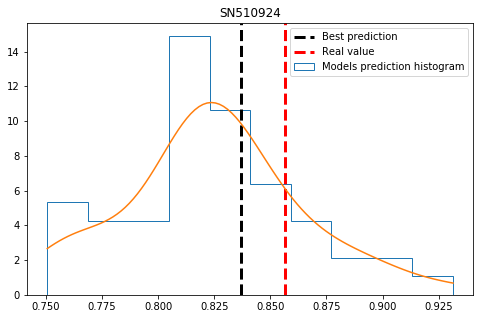

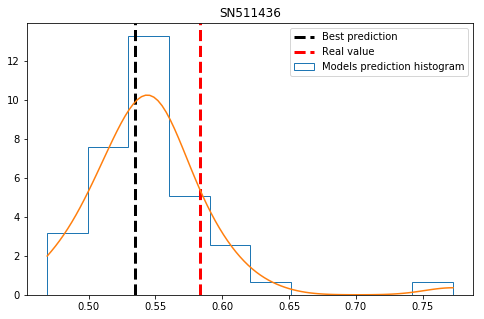

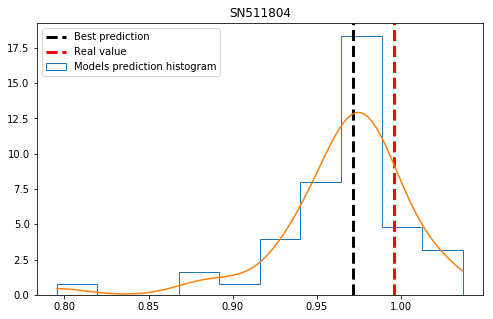

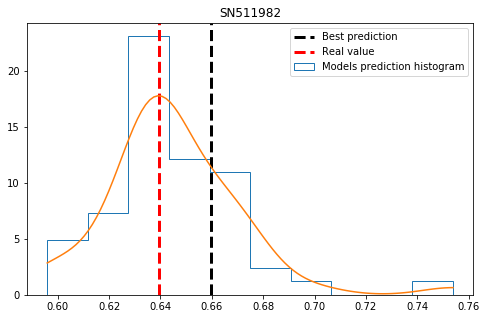

In [ ]:
for i in range(4):
    print_gaussian_kde(gen_gaussian_kde(predictions[i])[0], predictions[i], y_real[i], y_best_pred[i], df_predictions.index[i])

In [ ]:
df_kde = gen_df_gaussian_kde(df_predictions,
                             export_csv = True,
                             best_model = BEST_MODEL,
                             path = '../../data/enriched/pdf_redshift_preds.csv')

/home/fmoliveira/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_kde

,REDSHIFT_SPEC,StackedEnsemble_AllModels_AutoML_20201223_115349.zip,PDF,PDF_X_axis,predictions
ID,,,,,
SN510924,0.85640,0.836854,"[2.659382207157972, 2.818482034610413, 2.9687197305422317, 3.10907...","[0.7506580878638959, 0.7524836204626806, 0.7543091530614654, 0.756...","[0.7584974765777588, 0.83650803565979, 0.8526133419321796, 0.85056..."
SN511436,0.58313,0.534478,"[1.9923581687197947, 2.2366389362985784, 2.4974588375231317, 2.776...","[0.4689772725105286, 0.4720463703640168, 0.475115468217505, 0.4781...","[0.5076810717582703, 0.5254913568496704, 0.5430047821131541, 0.508..."
SN511804,0.99576,0.971700,"[0.43260271248902904, 0.4285483379474516, 0.41660486659847923, 0.3...","[0.7955023161024407, 0.7979380688303593, 0.8003738215582779, 0.802...","[1.0366418361663818, 0.9980481863021852, 0.9703357623215072, 0.983..."
SN511982,0.63949,0.659768,"[2.8433524754334054, 3.044804955127187, 3.2455871062462514, 3.4508...","[0.5959097146987915, 0.597505848284787, 0.5991019818707827, 0.6006...","[0.6341052055358887, 0.6204835176467896, 0.6448181378303944, 0.643..."
SN512006,0.99303,0.926702,"[0.34156730155051107, 0.3396914337617304, 0.33361421972846783, 0.3...","[0.7441684033166124, 0.7467391263331767, 0.7493098493497411, 0.751...","[0.9916722774505616, 0.9762735962867736, 0.9536867883720208, 0.933..."
...,...,...,...,...,...
SN98918,0.76083,0.874126,"[1.0633695495341304, 1.1528397923009566, 1.245324556187654, 1.3408...","[0.7459816336631775, 0.7481836357397751, 0.7503856378163727, 0.752...","[0.8799391388893127, 0.7847751379013062, 0.8449823352269833, 0.851..."
SN99404,0.89529,0.863056,"[0.4324853754541947, 0.4706767991040466, 0.5082729653427619, 0.545...","[0.4634721848755236, 0.4758342343664503, 0.4881962838573769, 0.500...","[0.8774228096008301, 0.6418916583061218, 0.7775104539226833, 0.880..."
SN99438,0.75966,0.804120,"[1.1076037351773698, 1.1803376544782165, 1.255359624009375, 1.3346...","[0.7227454234470959, 0.7239685236286657, 0.7251916238102355, 0.726...","[0.7649773359298706, 0.8203377723693848, 0.7667612498729669, 0.767..."


In [ ]:
len(df_kde['predictions'][0])

52